In [1]:
import pandas as pd

In [3]:
micros = pd.read_csv("microglia.caqtls.tsv", sep="\t", header=0)

In [5]:
micros.head()


,CHROM,POS0,POS,non-effect_allele,effect_allele,Top_SNP_perPeak,Beta,logfc.mean,sign.jsd.mean,IsUsed
0,chr2,199884842,199884843,A,G,rs281785,1.293180,-0.032774,-0.016354,False
1,chr2,200357679,200357680,A,T,rs2033804,-0.396164,0.008075,0.009565,False
2,chr2,200656659,200656660,T,C,rs2287012,-0.498759,-0.003838,-0.004759,False
3,chr1,172585460,172585461,A,G,rs10752994,-1.070820,-0.005939,-0.004529,False
4,chr1,172625477,172625478,C,T,rs12123755,0.816922,0.441283,0.047415,True


In [6]:
micros.shape

(4978, 10)

In [7]:
micrs1 = micros[micros["IsUsed"]]

In [8]:
micrs1.head()

,CHROM,POS0,POS,non-effect_allele,effect_allele,Top_SNP_perPeak,Beta,logfc.mean,sign.jsd.mean,IsUsed
4,chr1,172625477,172625478,C,T,rs12123755,0.816922,0.441283,0.047415,True
5,chr2,201661642,201661643,G,A,rs62193397,0.913101,0.428027,0.032660,True
6,chr2,201661642,201661643,G,A,rs62193397,1.123280,0.428027,0.032660,True
14,chr2,205546600,205546601,C,G,rs6435287,0.572607,0.077947,0.009463,True
20,chr2,206246233,206246234,T,G,rs12373575,1.080930,0.189114,0.060282,True


In [9]:
micrs1["rsid"] = micrs1["CHROM"] + "_" + micrs1["POS"].astype(str) + "_" + micrs1["non-effect_allele"] + "_" + micrs1["effect_allele"]

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
len(set(micrs1["rsid"]))

877

In [11]:
micrs1["rsid"].shape

(956,)

In [12]:
micrs1.head()

,CHROM,POS0,POS,non-effect_allele,effect_allele,Top_SNP_perPeak,Beta,logfc.mean,sign.jsd.mean,IsUsed,rsid
4,chr1,172625477,172625478,C,T,rs12123755,0.816922,0.441283,0.047415,True,chr1_172625478_C_T
5,chr2,201661642,201661643,G,A,rs62193397,0.913101,0.428027,0.032660,True,chr2_201661643_G_A
6,chr2,201661642,201661643,G,A,rs62193397,1.123280,0.428027,0.032660,True,chr2_201661643_G_A
14,chr2,205546600,205546601,C,G,rs6435287,0.572607,0.077947,0.009463,True,chr2_205546601_C_G
20,chr2,206246233,206246234,T,G,rs12373575,1.080930,0.189114,0.060282,True,chr2_206246234_T_G


In [13]:
micrs1["abs_beta"] = abs(micrs1["Beta"])
micros = micrs1.sort_values('abs_beta', ascending=False).drop_duplicates('rsid', keep="first").sort_index()

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
micros.shape

(877, 12)

(0.6020040820648366, 1.3726945418075504e-87)
(0.2671265805109169, 8.546691741238511e-16)


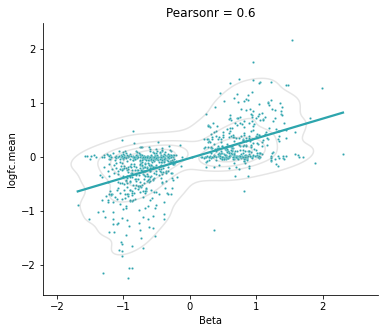

In [15]:
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np

data = pd.DataFrame()
data["logfc.mean"] = micros[micros["IsUsed"]==True]["logfc.mean"]
data["Beta"] = micros[micros["IsUsed"]==True]["Beta"]

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=5, color="#2da5ad")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#2da5ad")
ax.spines[["top", "right"]].set_visible(False)

values = []

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
values.append(atc_pear[0])
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))

atc_pear = scipy.stats.pearsonr(abs(data["logfc.mean"]),abs(data["Beta"]))
values.append(atc_pear[0])

print(atc_pear)
#ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))
#plt.savefig("subfigs/microglia_caqtls_scatter_plot.pdf", transparent=True, dpi=300)


(0.6014727844621959, 2.1301181463727593e-87)
(0.2569352071468207, 1.0909585816693852e-14)


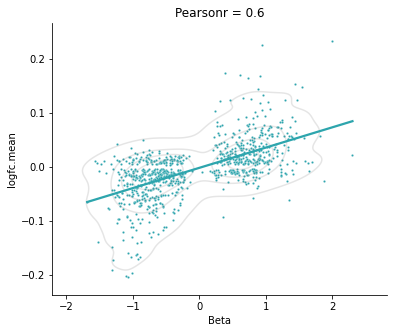

In [16]:
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np

data = pd.DataFrame()
data["logfc.mean"] = micros[micros["IsUsed"]==True]["sign.jsd.mean"]
data["Beta"] = micros[micros["IsUsed"]==True]["Beta"]

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=5, color="#2da5ad")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#2da5ad")
ax.spines[["top", "right"]].set_visible(False)

atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
values.append(atc_pear[0])

print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))

atc_pear = scipy.stats.pearsonr(abs(data["logfc.mean"]),abs(data["Beta"]))
values.append(atc_pear[0])

print(atc_pear)
#ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))
#plt.savefig("subfigs/microglia_caqtls_scatter_plot.pdf", transparent=True, dpi=300)


In [18]:
import pandas as pd

df = pd.DataFrame()


values = []

atac_pear = scipy.stats.pearsonr(micros[micros["IsUsed"]==True]["logfc.mean"],micros[micros["IsUsed"]==True]["Beta"])
values.append(atac_pear[0])
atac_pear = scipy.stats.pearsonr(micros[micros["IsUsed"]==True]["sign.jsd.mean"],micros[micros["IsUsed"]==True]["Beta"])
values.append(atac_pear[0])
atac_pear = scipy.stats.pearsonr(abs(micros[micros["IsUsed"]==True]["logfc.mean"]),abs(micros[micros["IsUsed"]==True]["Beta"]))
values.append(atac_pear[0])
atac_pear = scipy.stats.pearsonr(abs(micros[micros["IsUsed"]==True]["sign.jsd.mean"]),abs(micros[micros["IsUsed"]==True]["Beta"]))
values.append(atac_pear[0])

df["pearsonr"] = values
df["method"] = ["logfc-signed", "jsd-signed",  "logfc-unsigned", "jsd-unsigned"]
df["dtype"] = ["ATAC"]*4

0    0.602004
1    0.601473
2    0.267127
3    0.256935
Name: pearsonr, dtype: float64


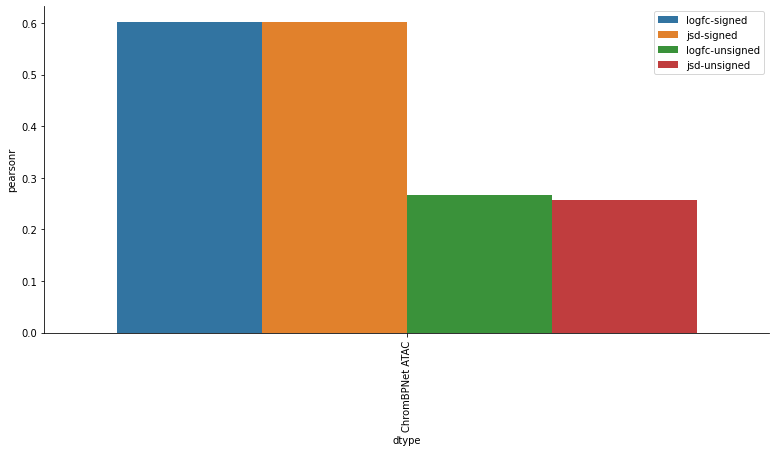

In [19]:
import seaborn as sns
import matplotlib
plt.figure(figsize=(13,6))

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 
print(df["pearsonr"])
ax = sns.barplot(data=df, x="dtype", y="pearsonr", hue="method")
xtix = ["ChromBPNet ATAC"]
ax.set_xticklabels(labels=xtix, rotation=90)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(loc="upper right")

#plt.savefig("subfigs/microglia_caqtls_compare.pdf", transparent=True, dpi=300)


(877, 2)
(0.6020040820648366, 1.3726945418075504e-87)
(0.2671265805109169, 8.546691741238511e-16)


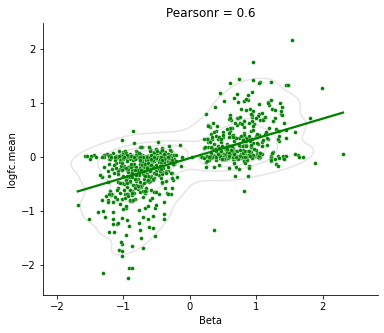

In [21]:
import matplotlib


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np

data = pd.DataFrame()
data["logfc.mean"] = micros["logfc.mean"]
data["Beta"] = micros["Beta"]

plt.figure(figsize=(6,5))

sns.kdeplot(
    data=data,
    x="Beta",
    y="logfc.mean",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)


ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=15, color="green")
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="green")
ax.spines[["top", "right"]].set_visible(False)

print(data.shape)
atc_pear = scipy.stats.pearsonr(data["logfc.mean"],data["Beta"])
print(atc_pear)
ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))

atc_pear = scipy.stats.pearsonr(abs(data["logfc.mean"]),abs(data["Beta"]))
print(atc_pear)
#ax.set_title("Pearsonr = "+str(np.round(atc_pear[0],2)))
